# Import modules

In [60]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## Load the car dataset into a pandas dataframe


In [61]:
car_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)

## Set the column names


In [62]:
car_df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

## Convert the categorical data to numerical data


In [63]:
car_df = pd.get_dummies(car_df, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

## Convert the 'class' column to a categorical variable and then to a numerical variable


In [64]:
car_df['class'] = pd.Categorical(car_df['class'], categories=['unacc', 'acc', 'good', 'vgood'])
car_df['class'] = car_df['class'].cat.codes

## Split the data into input features and labels


In [104]:
X = torch.tensor(car_df.drop('class', axis=1).values, dtype=torch.float64)   # cast to float64
y = torch.tensor(car_df['class'].values)  

## Split the data into training and testing sets


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Define the k-NN algorithm

In [106]:
def knn(X_train, y_train, X_test, k):
    distances = torch.cdist(X_train, X_test)
    _, indices = distances.sort(dim=0)
    k_indices = indices[:k, :]
    k_labels = y_train[k_indices]
    predictions = torch.mode(k_labels, dim=0).values
    return predictions

## Evaluate the k-NN algorithm on the testing set


In [107]:
A = []
for k in range(1,20):
    predictions = knn(X_train, y_train, X_test, k)
    accuracy = (predictions == y_test).sum().item() / len(y_test)
    A.append(accuracy)

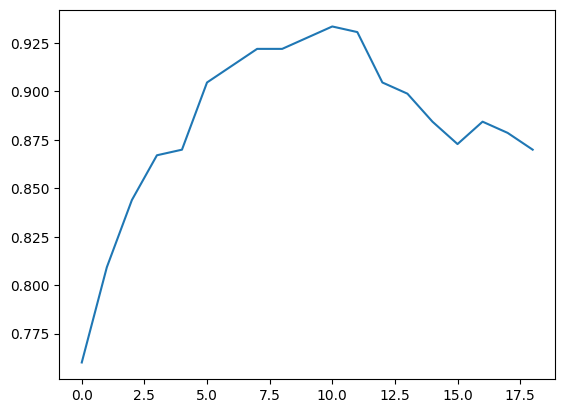

In [108]:
import matplotlib.pyplot as plt
plt.plot(A)
plt.show()

### Choose k = 11

In [114]:
k = 11
predictions = knn(X_train, y_train, X_test, k)
accuracy = (predictions == y_test).sum().item() / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9335260115606936
